In [1]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

import pymysql
pymysql.install_as_MySQLdb()

In [2]:
disease_file = "Resources/500_Cities__Local_Data_for_Better_Health__2018_release_small.csv"
disease_df = pd.read_csv(disease_file, index_col=None)
disease_df.head(2)

,Year,StateAbbr,StateDesc,CityName,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,...,High_Confidence_Limit,Data_Value_Footnote_Symbol,Data_Value_Footnote,PopulationCount,GeoLocation,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text
0,2016,US,United States,NaN,US,BRFSS,Prevention,59,Current lack of health insurance among adults ...,%,...,14.9,NaN,NaN,308745538,NaN,PREVENT,ACCESS2,NaN,NaN,Health Insurance
1,2016,US,United States,NaN,US,BRFSS,Health Outcomes,59,Arthritis among adults aged >=18 Years,%,...,23.2,NaN,NaN,308745538,NaN,HLTHOUT,ARTHRITIS,NaN,NaN,Arthritis


In [3]:
disease_df.keys()

Index(['Year', 'StateAbbr', 'StateDesc', 'CityName', 'GeographicLevel',
       'DataSource', 'Category', 'UniqueID', 'Measure', 'Data_Value_Unit',
       'DataValueTypeID', 'Data_Value_Type', 'Data_Value',
       'Low_Confidence_Limit', 'High_Confidence_Limit',
       'Data_Value_Footnote_Symbol', 'Data_Value_Footnote', 'PopulationCount',
       'GeoLocation', 'CategoryID', 'MeasureId', 'CityFIPS', 'TractFIPS',
       'Short_Question_Text'],
      dtype='object')

In [4]:
disease_df.count()

Year                          14028
StateAbbr                     14028
StateDesc                     14028
CityName                      14000
GeographicLevel               14028
DataSource                    14028
Category                      14028
UniqueID                      14028
Measure                       14028
Data_Value_Unit               14028
DataValueTypeID               14028
Data_Value_Type               14028
Data_Value                    13981
Low_Confidence_Limit          13981
High_Confidence_Limit         13981
Data_Value_Footnote_Symbol       48
Data_Value_Footnote              48
PopulationCount               14028
GeoLocation                   14000
CategoryID                    14028
MeasureId                     14028
CityFIPS                      14000
TractFIPS                         0
Short_Question_Text           14028
dtype: int64

## 1.1 Clean disease dataset:  filter, drop columns

In [5]:
# filter data to only keep city level data, Age-adjusted prevalence data type
disease_df = disease_df.loc[(disease_df['GeographicLevel'] == "City") 
                                & (disease_df['DataValueTypeID'] == "AgeAdjPrv"), :]
disease_df.count()

Year                          14000
StateAbbr                     14000
StateDesc                     14000
CityName                      14000
GeographicLevel               14000
DataSource                    14000
Category                      14000
UniqueID                      14000
Measure                       14000
Data_Value_Unit               14000
DataValueTypeID               14000
Data_Value_Type               14000
Data_Value                    13953
Low_Confidence_Limit          13953
High_Confidence_Limit         13953
Data_Value_Footnote_Symbol       47
Data_Value_Footnote              47
PopulationCount               14000
GeoLocation                   14000
CategoryID                    14000
MeasureId                     14000
CityFIPS                      14000
TractFIPS                         0
Short_Question_Text           14000
dtype: int64

### 1.1.1 asthma data

In [6]:
# further filter to get asthma data
asthma_2016_df = disease_df.loc[(disease_df['Measure'] == "Current asthma among adults aged >=18 Years")
                           & (disease_df['Year'] == 2016) ]

asthma_2016_df.head(2)

,Year,StateAbbr,StateDesc,CityName,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,...,High_Confidence_Limit,Data_Value_Footnote_Symbol,Data_Value_Footnote,PopulationCount,GeoLocation,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text
34,2016,AL,Alabama,Birmingham,City,BRFSS,Health Outcomes,107000,Current asthma among adults aged >=18 Years,%,...,10.6,NaN,NaN,212237,"(33.5275663773, -86.7988174678)",HLTHOUT,CASTHMA,107000.0,NaN,Current Asthma
62,2016,AL,Alabama,Hoover,City,BRFSS,Health Outcomes,135896,Current asthma among adults aged >=18 Years,%,...,8.0,NaN,NaN,81619,"(33.3767602729, -86.8051937568)",HLTHOUT,CASTHMA,135896.0,NaN,Current Asthma


In [7]:
#select columns
asthma_2016_df = asthma_2016_df[['StateAbbr', 'StateDesc', 'CityName',
       'Data_Value','Low_Confidence_Limit', 'High_Confidence_Limit',
       'PopulationCount','GeoLocation']].copy()
asthma_2016_df.head()

,StateAbbr,StateDesc,CityName,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,PopulationCount,GeoLocation
34,AL,Alabama,Birmingham,10.5,10.4,10.6,212237,"(33.5275663773, -86.7988174678)"
62,AL,Alabama,Hoover,7.9,7.7,8.0,81619,"(33.3767602729, -86.8051937568)"
90,AL,Alabama,Huntsville,9.5,9.4,9.6,180105,"(34.6989692671, -86.6387042882)"
118,AL,Alabama,Mobile,9.9,9.8,10.0,195111,"(30.6776248648, -88.1184482714)"
146,AL,Alabama,Montgomery,10.3,10.2,10.4,205764,"(32.3472645333, -86.2677059552)"


### 1.1.2 COPD data

In [8]:
# further filter to get asthma data
COPD_2016_df = disease_df.loc[(disease_df['Measure'] == "Chronic obstructive pulmonary disease among adults aged >=18 Years")
                           & (disease_df['Year'] == 2016) ]

COPD_2016_df.head(2)

,Year,StateAbbr,StateDesc,CityName,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,...,High_Confidence_Limit,Data_Value_Footnote_Symbol,Data_Value_Footnote,PopulationCount,GeoLocation,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text
39,2016,AL,Alabama,Birmingham,City,BRFSS,Health Outcomes,107000,Chronic obstructive pulmonary disease among ad...,%,...,8.9,NaN,NaN,212237,"(33.5275663773, -86.7988174678)",HLTHOUT,COPD,107000.0,NaN,COPD
67,2016,AL,Alabama,Hoover,City,BRFSS,Health Outcomes,135896,Chronic obstructive pulmonary disease among ad...,%,...,5.3,NaN,NaN,81619,"(33.3767602729, -86.8051937568)",HLTHOUT,COPD,135896.0,NaN,COPD


In [9]:
#select columns
COPD_2016_df = COPD_2016_df[['StateAbbr', 'CityName',
       'Data_Value','Low_Confidence_Limit', 'High_Confidence_Limit']].copy()
COPD_2016_df.head()

,StateAbbr,CityName,Data_Value,Low_Confidence_Limit,High_Confidence_Limit
39,AL,Birmingham,8.7,8.6,8.9
67,AL,Hoover,5.1,4.9,5.3
95,AL,Huntsville,7.4,7.3,7.6
123,AL,Mobile,8.2,8.1,8.4
151,AL,Montgomery,8.2,8.1,8.4


### 1.1.3 Stroke data

In [10]:
# further filter to get asthma data
stroke_2016_df = disease_df.loc[(disease_df['Measure'] == "Stroke among adults aged >=18 Years")
                           & (disease_df['Year'] == 2016) ]

stroke_2016_df.head(2)

,Year,StateAbbr,StateDesc,CityName,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,...,High_Confidence_Limit,Data_Value_Footnote_Symbol,Data_Value_Footnote,PopulationCount,GeoLocation,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text
52,2016,AL,Alabama,Birmingham,City,BRFSS,Health Outcomes,107000,Stroke among adults aged >=18 Years,%,...,5.1,NaN,NaN,212237,"(33.5275663773, -86.7988174678)",HLTHOUT,STROKE,107000.0,NaN,Stroke
82,2016,AL,Alabama,Hoover,City,BRFSS,Health Outcomes,135896,Stroke among adults aged >=18 Years,%,...,2.2,NaN,NaN,81619,"(33.3767602729, -86.8051937568)",HLTHOUT,STROKE,135896.0,NaN,Stroke


In [11]:
#select columns
stroke_2016_df = stroke_2016_df[['StateAbbr', 'CityName',
       'Data_Value','Low_Confidence_Limit', 'High_Confidence_Limit']].copy()
stroke_2016_df.head()

,StateAbbr,CityName,Data_Value,Low_Confidence_Limit,High_Confidence_Limit
52,AL,Birmingham,5.0,4.9,5.1
82,AL,Hoover,2.2,2.1,2.2
110,AL,Huntsville,3.3,3.3,3.4
138,AL,Mobile,4.2,4.2,4.3
166,AL,Montgomery,4.2,4.2,4.3


### 1.1.4 heart disease data

In [12]:
# further filter to get asthma data
heart_2016_df = disease_df.loc[(disease_df['Measure'] == "Coronary heart disease among adults aged >=18 Years")
                           & (disease_df['Year'] == 2016) ]

heart_2016_df.head(2)

,Year,StateAbbr,StateDesc,CityName,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,...,High_Confidence_Limit,Data_Value_Footnote_Symbol,Data_Value_Footnote,PopulationCount,GeoLocation,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text
35,2016,AL,Alabama,Birmingham,City,BRFSS,Health Outcomes,107000,Coronary heart disease among adults aged >=18 ...,%,...,7.5,NaN,NaN,212237,"(33.5275663773, -86.7988174678)",HLTHOUT,CHD,107000.0,NaN,Coronary Heart Disease
63,2016,AL,Alabama,Hoover,City,BRFSS,Health Outcomes,135896,Coronary heart disease among adults aged >=18 ...,%,...,5.2,NaN,NaN,81619,"(33.3767602729, -86.8051937568)",HLTHOUT,CHD,135896.0,NaN,Coronary Heart Disease


In [13]:
#select columns
heart_2016_df = heart_2016_df[['StateAbbr', 'CityName',
       'Data_Value','Low_Confidence_Limit', 'High_Confidence_Limit']].copy()
heart_2016_df.head()

,StateAbbr,CityName,Data_Value,Low_Confidence_Limit,High_Confidence_Limit
35,AL,Birmingham,7.5,7.4,7.5
63,AL,Hoover,5.1,5.0,5.2
91,AL,Huntsville,6.4,6.3,6.5
119,AL,Mobile,7.2,7.1,7.3
147,AL,Montgomery,6.9,6.8,7.0


## 1.2 Merge dataframes

In [14]:
disease_2016_df1 = pd.merge(asthma_2016_df, COPD_2016_df, on=['StateAbbr','CityName'], suffixes=('_asthma', '_COPD'))
disease_2016_df1.head()

,StateAbbr,StateDesc,CityName,Data_Value_asthma,Low_Confidence_Limit_asthma,High_Confidence_Limit_asthma,PopulationCount,GeoLocation,Data_Value_COPD,Low_Confidence_Limit_COPD,High_Confidence_Limit_COPD
0,AL,Alabama,Birmingham,10.5,10.4,10.6,212237,"(33.5275663773, -86.7988174678)",8.7,8.6,8.9
1,AL,Alabama,Hoover,7.9,7.7,8.0,81619,"(33.3767602729, -86.8051937568)",5.1,4.9,5.3
2,AL,Alabama,Huntsville,9.5,9.4,9.6,180105,"(34.6989692671, -86.6387042882)",7.4,7.3,7.6
3,AL,Alabama,Mobile,9.9,9.8,10.0,195111,"(30.6776248648, -88.1184482714)",8.2,8.1,8.4
4,AL,Alabama,Montgomery,10.3,10.2,10.4,205764,"(32.3472645333, -86.2677059552)",8.2,8.1,8.4


In [15]:
disease_2016_df2 = pd.merge(stroke_2016_df, heart_2016_df, on=['StateAbbr','CityName'], suffixes=('_stroke', '_heart'))
disease_2016_df2.head()

,StateAbbr,CityName,Data_Value_stroke,Low_Confidence_Limit_stroke,High_Confidence_Limit_stroke,Data_Value_heart,Low_Confidence_Limit_heart,High_Confidence_Limit_heart
0,AL,Birmingham,5.0,4.9,5.1,7.5,7.4,7.5
1,AL,Hoover,2.2,2.1,2.2,5.1,5.0,5.2
2,AL,Huntsville,3.3,3.3,3.4,6.4,6.3,6.5
3,AL,Mobile,4.2,4.2,4.3,7.2,7.1,7.3
4,AL,Montgomery,4.2,4.2,4.3,6.9,6.8,7.0


In [16]:
disease_2016_df = pd.merge(disease_2016_df1, disease_2016_df2, on=['StateAbbr','CityName'], suffixes=('', ''))
disease_2016_df.head()

,StateAbbr,StateDesc,CityName,Data_Value_asthma,Low_Confidence_Limit_asthma,High_Confidence_Limit_asthma,PopulationCount,GeoLocation,Data_Value_COPD,Low_Confidence_Limit_COPD,High_Confidence_Limit_COPD,Data_Value_stroke,Low_Confidence_Limit_stroke,High_Confidence_Limit_stroke,Data_Value_heart,Low_Confidence_Limit_heart,High_Confidence_Limit_heart
0,AL,Alabama,Birmingham,10.5,10.4,10.6,212237,"(33.5275663773, -86.7988174678)",8.7,8.6,8.9,5.0,4.9,5.1,7.5,7.4,7.5
1,AL,Alabama,Hoover,7.9,7.7,8.0,81619,"(33.3767602729, -86.8051937568)",5.1,4.9,5.3,2.2,2.1,2.2,5.1,5.0,5.2
2,AL,Alabama,Huntsville,9.5,9.4,9.6,180105,"(34.6989692671, -86.6387042882)",7.4,7.3,7.6,3.3,3.3,3.4,6.4,6.3,6.5
3,AL,Alabama,Mobile,9.9,9.8,10.0,195111,"(30.6776248648, -88.1184482714)",8.2,8.1,8.4,4.2,4.2,4.3,7.2,7.1,7.3
4,AL,Alabama,Montgomery,10.3,10.2,10.4,205764,"(32.3472645333, -86.2677059552)",8.2,8.1,8.4,4.2,4.2,4.3,6.9,6.8,7.0


In [17]:
# sort by city population
disease_2016_df = disease_2016_df.sort_values("PopulationCount", ascending=False)

In [18]:
# reset index
disease_2016_df.reset_index(drop=True, inplace=True)
disease_2016_df.head(21)

,StateAbbr,StateDesc,CityName,Data_Value_asthma,Low_Confidence_Limit_asthma,High_Confidence_Limit_asthma,PopulationCount,GeoLocation,Data_Value_COPD,Low_Confidence_Limit_COPD,High_Confidence_Limit_COPD,Data_Value_stroke,Low_Confidence_Limit_stroke,High_Confidence_Limit_stroke,Data_Value_heart,Low_Confidence_Limit_heart,High_Confidence_Limit_heart
0,NY,New York,New York,10.5,10.5,10.5,8175133,"(40.694960689, -73.9313850409)",6.0,6.0,6.0,3.2,3.2,3.2,5.8,5.8,5.8
1,CA,California,Los Angeles,8.5,8.5,8.5,3792621,"(34.1182277898, -118.408500088)",5.6,5.5,5.6,3.1,3.1,3.1,5.4,5.4,5.5
2,IL,Illinois,Chicago,9.9,9.9,9.9,2695598,"(41.8372950615, -87.6862308732)",6.2,6.2,6.3,3.7,3.7,3.8,6.0,6.0,6.0
3,TX,Texas,Houston,8.8,8.7,8.8,2099451,"(29.7806691396, -95.3860033966)",6.1,6.1,6.1,3.6,3.5,3.6,6.5,6.5,6.6
4,PA,Pennsylvania,Philadelphia,11.6,11.6,11.7,1526006,"(40.0093147808, -75.1333888571)",7.2,7.1,7.2,4.1,4.1,4.1,6.6,6.5,6.6
5,AZ,Arizona,Phoenix,10.2,10.1,10.2,1445632,"(33.5724138695, -112.088995222)",6.5,6.5,6.6,3.3,3.3,3.3,6.3,6.3,6.3
6,TX,Texas,San Antonio,8.4,8.3,8.4,1327407,"(29.4721475333, -98.5246763525)",5.6,5.5,5.6,3.2,3.2,3.2,6.3,6.3,6.4
7,CA,California,San Diego,8.0,8.0,8.0,1307402,"(32.8355639418, -117.119792061)",4.6,4.6,4.7,2.5,2.5,2.5,4.9,4.8,4.9
8,TX,Texas,Dallas,9.3,9.3,9.4,1197816,"(32.7939804066, -96.7656929463)",6.4,6.3,6.4,3.8,3.8,3.8,6.6,6.6,6.7
9,HI,Hawaii,Honolulu,9.6,9.6,9.6,953207,"(21.4588039305, -157.973296737)",3.9,3.9,3.9,2.4,2.4,2.4,4.6,4.6,4.6


In [19]:
disease_2016_df.columns

Index(['StateAbbr', 'StateDesc', 'CityName', 'Data_Value_asthma',
       'Low_Confidence_Limit_asthma', 'High_Confidence_Limit_asthma',
       'PopulationCount', 'GeoLocation', 'Data_Value_COPD',
       'Low_Confidence_Limit_COPD', 'High_Confidence_Limit_COPD',
       'Data_Value_stroke', 'Low_Confidence_Limit_stroke',
       'High_Confidence_Limit_stroke', 'Data_Value_heart',
       'Low_Confidence_Limit_heart', 'High_Confidence_Limit_heart'],
      dtype='object')

In [20]:
# rename the columns (High_Confidence_Limit to HCL, Low_Confidence_Limit to LCL)
disease_2016_df.columns = ['State', 'StateDesc', 'City', 
                           'Asthma_Prevalence','Asthma_LCL', 'Asthma_HCL','Population', 'Location', 
                           'COPD_Prevalence','COPD_LCL', 'COPD_HCL','Stroke_Prevalence', 'Stroke_LCL',
                           'Stroke_HCL', 'Heart_Prevalence','Heart_LCL', 'Heart_HCL']
disease_2016_df.head()

,State,StateDesc,City,Asthma_Prevalence,Asthma_LCL,Asthma_HCL,Population,Location,COPD_Prevalence,COPD_LCL,COPD_HCL,Stroke_Prevalence,Stroke_LCL,Stroke_HCL,Heart_Prevalence,Heart_LCL,Heart_HCL
0,NY,New York,New York,10.5,10.5,10.5,8175133,"(40.694960689, -73.9313850409)",6.0,6.0,6.0,3.2,3.2,3.2,5.8,5.8,5.8
1,CA,California,Los Angeles,8.5,8.5,8.5,3792621,"(34.1182277898, -118.408500088)",5.6,5.5,5.6,3.1,3.1,3.1,5.4,5.4,5.5
2,IL,Illinois,Chicago,9.9,9.9,9.9,2695598,"(41.8372950615, -87.6862308732)",6.2,6.2,6.3,3.7,3.7,3.8,6.0,6.0,6.0
3,TX,Texas,Houston,8.8,8.7,8.8,2099451,"(29.7806691396, -95.3860033966)",6.1,6.1,6.1,3.6,3.5,3.6,6.5,6.5,6.6
4,PA,Pennsylvania,Philadelphia,11.6,11.6,11.7,1526006,"(40.0093147808, -75.1333888571)",7.2,7.1,7.2,4.1,4.1,4.1,6.6,6.5,6.6


In [21]:
# rearrange the sequence of columns
disease_2016_df = disease_2016_df[['State', 'City', 
                           'Asthma_Prevalence','COPD_Prevalence','Stroke_Prevalence','Heart_Prevalence',
                           'Location', 'Population', 'Asthma_LCL', 'Asthma_HCL','COPD_LCL', 'COPD_HCL',
                            'Stroke_LCL','Stroke_HCL','Heart_LCL', 'Heart_HCL']]
disease_2016_df.head()

,State,City,Asthma_Prevalence,COPD_Prevalence,Stroke_Prevalence,Heart_Prevalence,Location,Population,Asthma_LCL,Asthma_HCL,COPD_LCL,COPD_HCL,Stroke_LCL,Stroke_HCL,Heart_LCL,Heart_HCL
0,NY,New York,10.5,6.0,3.2,5.8,"(40.694960689, -73.9313850409)",8175133,10.5,10.5,6.0,6.0,3.2,3.2,5.8,5.8
1,CA,Los Angeles,8.5,5.6,3.1,5.4,"(34.1182277898, -118.408500088)",3792621,8.5,8.5,5.5,5.6,3.1,3.1,5.4,5.5
2,IL,Chicago,9.9,6.2,3.7,6.0,"(41.8372950615, -87.6862308732)",2695598,9.9,9.9,6.2,6.3,3.7,3.8,6.0,6.0
3,TX,Houston,8.8,6.1,3.6,6.5,"(29.7806691396, -95.3860033966)",2099451,8.7,8.8,6.1,6.1,3.5,3.6,6.5,6.6
4,PA,Philadelphia,11.6,7.2,4.1,6.6,"(40.0093147808, -75.1333888571)",1526006,11.6,11.7,7.1,7.2,4.1,4.1,6.5,6.6


In [22]:
disease_2016_df.to_csv("Output/disease_2016.csv", index=False, encoding="utf-8", header=True)

## 2.1 Past air quality data

In [23]:
air_file = "Resources/annual_aqi_by_cbsa_2016_add_city_column.csv"
air_2016_df = pd.read_csv(air_file, index_col=None)
air_2016_df.head()

,State,City,CBSA,CBSA Code,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,...,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10
0,NaN,NaN,"Aberdeen, SD",10100,2016,119,113,6,0,0,...,0,76,42,20,0,0,0,0,103,16
1,NaN,NaN,"Aberdeen, WA",10140,2016,364,355,9,0,0,...,0,71,37,21,0,0,0,0,364,0
2,NaN,NaN,"Adjuntas, PR",10260,2016,97,90,7,0,0,...,0,72,47,21,0,0,0,0,97,0
3,NaN,NaN,"Adrian, MI",10300,2016,361,286,73,2,0,...,0,119,58,40,0,0,163,0,198,0
4,NaN,NaN,"Akron, OH",10420,2016,366,254,111,1,0,...,0,112,61,44,0,0,129,0,237,0


In [24]:
air_2016_df = air_2016_df.dropna(how="any")

In [25]:
air_2016_df.count()

State                                  20
City                                   20
CBSA                                   20
CBSA Code                              20
Year                                   20
Days with AQI                          20
Good Days                              20
Moderate Days                          20
Unhealthy for Sensitive Groups Days    20
Unhealthy Days                         20
Very Unhealthy Days                    20
Hazardous Days                         20
Max AQI                                20
90th Percentile AQI                    20
Median AQI                             20
Days CO                                20
Days NO2                               20
Days Ozone                             20
Days SO2                               20
Days PM2.5                             20
Days PM10                              20
dtype: int64

In [26]:
air_2016_df.keys()

Index(['State', 'City', 'CBSA', 'CBSA Code', 'Year', 'Days with AQI',
       'Good Days', 'Moderate Days', 'Unhealthy for Sensitive Groups Days',
       'Unhealthy Days', 'Very Unhealthy Days', 'Hazardous Days', 'Max AQI',
       '90th Percentile AQI', 'Median AQI', 'Days CO', 'Days NO2',
       'Days Ozone', 'Days SO2', 'Days PM2.5', 'Days PM10'],
      dtype='object')

In [27]:
#select columns
air_2016_df = air_2016_df[['State', 'City','CBSA','Days with AQI', 'Good Days',
       'Moderate Days', 'Unhealthy for Sensitive Groups Days',
       'Unhealthy Days', 'Very Unhealthy Days', 'Hazardous Days', 'Median AQI','Days Ozone', 'Days PM2.5']].copy()
air_2016_df.head()

,State,City,CBSA,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Median AQI,Days Ozone,Days PM2.5
29,TX,Austin,"Austin-Round Rock, TX",366,280,85,1,0,0,0,42,225,122
83,NC,Charlotte,"Charlotte-Concord-Gastonia, NC-SC",366,227,130,7,2,0,0,46,263,97
87,IL,Chicago,"Chicago-Naperville-Elgin, IL-IN-WI",366,151,187,23,4,1,0,54,119,175
105,OH,Columbus,"Columbus, OH",366,264,92,10,0,0,0,42,188,136
116,TX,Dallas,"Dallas-Fort Worth-Arlington, TX",366,217,131,17,1,0,0,48,242,112


In [28]:
# rename the columns (High_Confidence_Limit to HCL, Low_Confidence_Limit to LCL)
air_2016_df.columns = ['State', 'City','CBSA','Days_with_AQI', 'Good_Days',
       'Moderate_Days', 'Unhealthy_for_Sensitive_Groups Days',
       'Unhealthy_Days', 'Very_Unhealthy_Days', 'Hazardous_Days', 'Median_AQI','Days_Ozone', 'Days_PM2.5']
air_2016_df.head()

,State,City,CBSA,Days_with_AQI,Good_Days,Moderate_Days,Unhealthy_for_Sensitive_Groups Days,Unhealthy_Days,Very_Unhealthy_Days,Hazardous_Days,Median_AQI,Days_Ozone,Days_PM2.5
29,TX,Austin,"Austin-Round Rock, TX",366,280,85,1,0,0,0,42,225,122
83,NC,Charlotte,"Charlotte-Concord-Gastonia, NC-SC",366,227,130,7,2,0,0,46,263,97
87,IL,Chicago,"Chicago-Naperville-Elgin, IL-IN-WI",366,151,187,23,4,1,0,54,119,175
105,OH,Columbus,"Columbus, OH",366,264,92,10,0,0,0,42,188,136
116,TX,Dallas,"Dallas-Fort Worth-Arlington, TX",366,217,131,17,1,0,0,48,242,112


## 3.1 Merge disease and air quality data

In [29]:
summary_2016_df = pd.merge(disease_2016_df, air_2016_df, on=['City','State'], suffixes=('', ''))
summary_2016_df.head()

,State,City,Asthma_Prevalence,COPD_Prevalence,Stroke_Prevalence,Heart_Prevalence,Location,Population,Asthma_LCL,Asthma_HCL,...,Days_with_AQI,Good_Days,Moderate_Days,Unhealthy_for_Sensitive_Groups Days,Unhealthy_Days,Very_Unhealthy_Days,Hazardous_Days,Median_AQI,Days_Ozone,Days_PM2.5
0,NY,New York,10.5,6.0,3.2,5.8,"(40.694960689, -73.9313850409)",8175133,10.5,10.5,...,366,155,181,28,2,0,0,53,162,160
1,CA,Los Angeles,8.5,5.6,3.1,5.4,"(34.1182277898, -118.408500088)",3792621,8.5,8.5,...,366,32,226,83,21,4,0,75,181,153
2,IL,Chicago,9.9,6.2,3.7,6.0,"(41.8372950615, -87.6862308732)",2695598,9.9,9.9,...,366,151,187,23,4,1,0,54,119,175
3,TX,Houston,8.8,6.1,3.6,6.5,"(29.7806691396, -95.3860033966)",2099451,8.7,8.8,...,366,164,179,22,1,0,0,52,189,145
4,PA,Philadelphia,11.6,7.2,4.1,6.6,"(40.0093147808, -75.1333888571)",1526006,11.6,11.7,...,366,122,224,18,2,0,0,57,134,214


In [30]:
summary_2016_df.to_csv("Output/summary_2016.csv", index=False, encoding="utf-8", header=True)

## 4.1 Air Quality history data (Median AQI)

In [31]:
# df used to convert CBSA to cities
CBSA_to_city_df = air_2016_df[['State', 'City','CBSA']]
CBSA_to_city_df

,State,City,CBSA
29,TX,Austin,"Austin-Round Rock, TX"
83,NC,Charlotte,"Charlotte-Concord-Gastonia, NC-SC"
87,IL,Chicago,"Chicago-Naperville-Elgin, IL-IN-WI"
105,OH,Columbus,"Columbus, OH"
116,TX,Dallas,"Dallas-Fort Worth-Arlington, TX"
117,TX,Fort Worth,"Dallas-Fort Worth-Arlington, TX"
128,MI,Detroit,"Detroit-Warren-Dearborn, MI"
219,TX,Houston,"Houston-The Woodlands-Sugar Land, TX"
225,IN,Indianapolis,"Indianapolis-Carmel-Anderson, IN"
231,FL,Jacksonville,"Jacksonville, FL"


In [32]:
# drop the city belongs to same CBSA (drop city Fort, TX)
CBSA_to_city_df = CBSA_to_city_df.drop_duplicates(subset=['CBSA'], keep="first")
CBSA_to_city_df.count()

State    19
City     19
CBSA     19
dtype: int64

In [33]:
x = 2018
annual_air_file = f'Resources/annual_aqi_by_cbsa_{x}.csv'
annual_air_df = pd.read_csv(annual_air_file, index_col=None)
annual_air_df = annual_air_df[['CBSA','Median AQI']].copy()
annual_air_df.columns = ['CBSA',f'{x}']
annual_air_df.head()

,CBSA,2018
0,"Aberdeen, SD",24
1,"Aberdeen, WA",22
2,"Adjuntas, PR",14
3,"Adrian, MI",38
4,"Akron, OH",42


In [34]:
# create air history df
air_summary_df = pd.merge(CBSA_to_city_df, annual_air_df, on=['CBSA'], suffixes=('', ''))
for x in range(2017,2000,-1):
    annual_air_file = f'Resources/annual_aqi_by_cbsa_{x}.csv'
    annual_air_df = pd.read_csv(annual_air_file, index_col=None)
    annual_air_df = annual_air_df[['CBSA','Median AQI']].copy()
    annual_air_df.columns = ['CBSA',f'{x}']
    air_summary_df = pd.merge(air_summary_df, annual_air_df, on=['CBSA'], suffixes=('', ''))
air_summary_df

,State,City,CBSA,2018,2017,2016,2015,2014,2013,2012,...,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001
0,TX,Austin,"Austin-Round Rock, TX",44,43,42,44,44,44,44,...,42,44,45,43,46,46,35,44,47,48
1,NC,Charlotte,"Charlotte-Concord-Gastonia, NC-SC",45,48,46,49,48,45,49,...,56,52,58,67,65,64,60,61,61,64
2,IL,Chicago,"Chicago-Naperville-Elgin, IL-IN-WI",57,53,54,57,62,60,64,...,71,63,76,77,71,77,77,71,77,84
3,OH,Columbus,"Columbus, OH",44,42,42,44,47,46,49,...,51,41,44,47,45,48,58,60,61,64
4,TX,Dallas,"Dallas-Fort Worth-Arlington, TX",50,50,48,50,51,57,56,...,52,53,57,56,60,65,55,65,59,71
5,MI,Detroit,"Detroit-Warren-Dearborn, MI",54,54,54,55,57,53,59,...,54,48,54,61,64,74,68,70,73,76
6,TX,Houston,"Houston-The Woodlands-Sugar Land, TX",51,50,52,54,54,53,55,...,58,58,63,65,69,71,68,70,62,67
7,IN,Indianapolis,"Indianapolis-Carmel-Anderson, IN",50,48,49,53,59,60,62,...,64,59,61,69,66,72,67,66,67,70
8,FL,Jacksonville,"Jacksonville, FL",41,42,44,40,44,40,40,...,48,45,48,51,55,57,57,50,54,58
9,CA,Los Angeles,"Los Angeles-Long Beach-Anaheim, CA",77,79,75,80,80,77,84,...,77,80,86,81,84,84,91,97,100,101


In [35]:
air_summary_df = air_summary_df.sort_values("2018", ascending=False)
air_summary_df

,State,City,CBSA,2018,2017,2016,2015,2014,2013,2012,...,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001
9,CA,Los Angeles,"Los Angeles-Long Beach-Anaheim, CA",77,79,75,80,80,77,84,...,77,80,86,81,84,84,91,97,100,101
13,AZ,Phoenix,"Phoenix-Mesa-Scottsdale, AZ",77,84,74,71,83,80,84,...,74,79,107,113,140,80,69,74,80,80
15,CA,San Diego,"San Diego-Carlsbad, CA",64,65,66,61,61,66,64,...,61,67,72,67,70,67,67,68,74,77
2,IL,Chicago,"Chicago-Naperville-Elgin, IL-IN-WI",57,53,54,57,62,60,64,...,71,63,76,77,71,77,77,71,77,84
12,PA,Philadelphia,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",55,55,57,57,59,57,60,...,59,60,63,66,69,71,68,75,76,80
5,MI,Detroit,"Detroit-Warren-Dearborn, MI",54,54,54,55,57,53,59,...,54,48,54,61,64,74,68,70,73,76
16,CA,San Francisco,"San Francisco-Oakland-Hayward, CA",53,52,47,48,48,53,46,...,48,53,52,45,49,48,48,46,48,46
11,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",53,52,53,57,56,54,58,...,58,61,67,66,67,66,65,67,65,73
6,TX,Houston,"Houston-The Woodlands-Sugar Land, TX",51,50,52,54,54,53,55,...,58,58,63,65,69,71,68,70,62,67
4,TX,Dallas,"Dallas-Fort Worth-Arlington, TX",50,50,48,50,51,57,56,...,52,53,57,56,60,65,55,65,59,71


In [36]:
air_summary_df = air_summary_df.drop(columns = ["CBSA"])
air_summary_df = air_summary_df.reset_index(drop=True)
air_summary_df.head()

,State,City,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001
0,CA,Los Angeles,77,79,75,80,80,77,84,80,77,80,86,81,84,84,91,97,100,101
1,AZ,Phoenix,77,84,74,71,83,80,84,87,74,79,107,113,140,80,69,74,80,80
2,CA,San Diego,64,65,66,61,61,66,64,63,61,67,72,67,70,67,67,68,74,77
3,IL,Chicago,57,53,54,57,62,60,64,64,71,63,76,77,71,77,77,71,77,84
4,PA,Philadelphia,55,55,57,57,59,57,60,61,59,60,63,66,69,71,68,75,76,80


In [37]:
air_summary_df.to_csv("Output/air_summary_column_year.csv", index=False, encoding="utf-8", header=True)

In [38]:
# transpose the dataframe for easy plotting
air_summary_df_transposed = air_summary_df.set_index("City")
air_summary_df_transposed = air_summary_df_transposed.drop(columns = ["State"])
air_summary_df_transposed = air_summary_df_transposed.T
air_summary_df_transposed.head()

City,Los Angeles,Phoenix,San Diego,Chicago,Philadelphia,Detroit,San Francisco,New York,Houston,Dallas,Indianapolis,San Jose,Charlotte,Austin,Memphis,Columbus,San Antonio,Jacksonville,Honolulu
2018,77,77,64,57,55,54,53,53,51,50,50,47,45,44,44,44,43,41,30
2017,79,84,65,53,55,54,52,52,50,50,48,45,48,43,44,42,43,42,31
2016,75,74,66,54,57,54,47,53,52,48,49,44,46,42,44,42,43,44,31
2015,80,71,61,57,57,55,48,57,54,50,53,46,49,44,44,44,46,40,34
2014,80,83,61,62,59,57,48,56,54,51,59,44,48,44,45,47,48,44,29


In [39]:
#this method to convert index column to normal column does not work
# air_summary_df_transposed.reset_index()
# air_summary_df_transposed.keys()
# air_summary_df_transposed.rename(columns={"City": "Year"} )
# air_summary_df_transposed.head()

In [40]:
# generate Year value for new column "Year"
year_list = []
for y in range(2018,2000,-1):
    year_list.append(y)
print(year_list)    

[2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001]


In [41]:
air_summary_df_transposed.insert(0, "Year", year_list, True)
air_summary_df_transposed.keys()

Index(['Year', 'Los Angeles', 'Phoenix', 'San Diego', 'Chicago',
       'Philadelphia', 'Detroit', 'San Francisco', 'New York', 'Houston',
       'Dallas', 'Indianapolis', 'San Jose', 'Charlotte', 'Austin', 'Memphis',
       'Columbus', 'San Antonio', 'Jacksonville', 'Honolulu'],
      dtype='object', name='City')

In [42]:
air_summary_df_transposed.to_csv("Output/air_summary_column_city.csv", index=False, encoding="utf-8", header=True)

In [43]:
worldairdata_file = "Resources/worldairdata.csv"
worldairdata_df = pd.read_csv(worldairdata_file, index_col=None)
worldairdata_df.head(2)

,lat,lng,date,time,PM25,index
0,34.005852,71.53775,6/18/2019,19:00,168,1
1,31.560078,74.33589,6/18/2019,19:00,163,2


## 4.1 Load to DB

In [44]:
database = {
    'user': 'SecondProject', 
    'password': 'p2password',
    'port': '3306',
    'host': 'localhost',
    'database': 'project2',
    'dialect': 'mysql',
    'driver': None
}

In [45]:
db_prefix = database['dialect']
if database['driver'] is not None:
    db_prefix += database['driver']

In [46]:
DATABASE_URL = f"{db_prefix}://{database['user']}:{database['password']}@{database['host']}:{database['port']}/{database['database']}"

In [47]:
engine = create_engine(DATABASE_URL)

In [48]:
engine.table_names()

[]

In [49]:
summary_2016_df.to_sql(name='summary_2016', con=engine, if_exists='append',index=False)

In [50]:
air_summary_df_transposed.to_sql(name='air_summary', con=engine, if_exists='append',index=False)

In [51]:
worldairdata_df.to_sql(name='worldaire', con=engine, if_exists='append',index=False)

In [52]:
engine.table_names()

['air_summary', 'summary_2016', 'worldaire']

In [53]:
pd.read_sql_query('select * from summary_2016', con=engine).head()

,State,City,Asthma_Prevalence,COPD_Prevalence,Stroke_Prevalence,Heart_Prevalence,Location,Population,Asthma_LCL,Asthma_HCL,...,Days_with_AQI,Good_Days,Moderate_Days,Unhealthy_for_Sensitive_Groups Days,Unhealthy_Days,Very_Unhealthy_Days,Hazardous_Days,Median_AQI,Days_Ozone,Days_PM2.5
0,NY,New York,10.5,6.0,3.2,5.8,"(40.694960689, -73.9313850409)",8175133,10.5,10.5,...,366,155,181,28,2,0,0,53,162,160
1,CA,Los Angeles,8.5,5.6,3.1,5.4,"(34.1182277898, -118.408500088)",3792621,8.5,8.5,...,366,32,226,83,21,4,0,75,181,153
2,IL,Chicago,9.9,6.2,3.7,6.0,"(41.8372950615, -87.6862308732)",2695598,9.9,9.9,...,366,151,187,23,4,1,0,54,119,175
3,TX,Houston,8.8,6.1,3.6,6.5,"(29.7806691396, -95.3860033966)",2099451,8.7,8.8,...,366,164,179,22,1,0,0,52,189,145
4,PA,Philadelphia,11.6,7.2,4.1,6.6,"(40.0093147808, -75.1333888571)",1526006,11.6,11.7,...,366,122,224,18,2,0,0,57,134,214


In [54]:
pd.read_sql_query('select * from air_summary', con=engine).head()

,Year,Los Angeles,Phoenix,San Diego,Chicago,Philadelphia,Detroit,San Francisco,New York,Houston,Dallas,Indianapolis,San Jose,Charlotte,Austin,Memphis,Columbus,San Antonio,Jacksonville,Honolulu
0,2018,77,77,64,57,55,54,53,53,51,50,50,47,45,44,44,44,43,41,30
1,2017,79,84,65,53,55,54,52,52,50,50,48,45,48,43,44,42,43,42,31
2,2016,75,74,66,54,57,54,47,53,52,48,49,44,46,42,44,42,43,44,31
3,2015,80,71,61,57,57,55,48,57,54,50,53,46,49,44,44,44,46,40,34
4,2014,80,83,61,62,59,57,48,56,54,51,59,44,48,44,45,47,48,44,29


## 5.1 Build the plot： Air Quality vs Disease

In [56]:
air_median_AQI = summary_2016_df["Median_AQI"]
daysUnhealthyForSensitiveOrAbove = summary_2016_df['Unhealthy_for_Sensitive_Groups Days'] \
    + summary_2016_df['Unhealthy_Days'] + summary_2016_df['Very_Unhealthy_Days'] + summary_2016_df['Hazardous_Days']
asthma_prevalence = summary_2016_df["Asthma_Prevalence"]
COPD_prevalence = summary_2016_df["COPD_Prevalence"]
stroke_prevalence = summary_2016_df["Stroke_Prevalence"]
heart_prevalence = summary_2016_df["Heart_Prevalence"]
population = summary_2016_df["Population"]

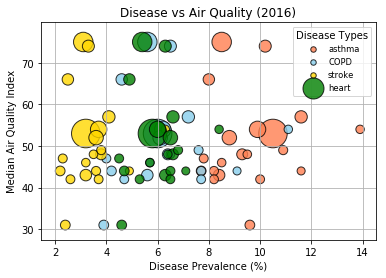

In [57]:
# using AQI (air quality index) for y
plt.scatter(asthma_prevalence,
            air_median_AQI,
            s=population/10000, c="coral",
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="asthma")

plt.scatter(COPD_prevalence,
            air_median_AQI,
            s=population/10000, c="skyblue",
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="COPD")

plt.scatter(stroke_prevalence,
            air_median_AQI,
            s=population/10000, c="gold",
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="stroke")

plt.scatter(heart_prevalence,
            air_median_AQI,
            s=population/10000, c="green",
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="heart")

# Incorporate the other graph properties
plt.title("Disease vs Air Quality (2016)")
plt.ylabel("Median Air Quality Index")
plt.xlabel("Disease Prevalence (%)")
# plt.xlim((0,40))
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="small", mode="Expanded",
                  numpoints=1, scatterpoints=1,
                  loc="best", title="Disease Types",
                  labelspacing=0.5)

lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]


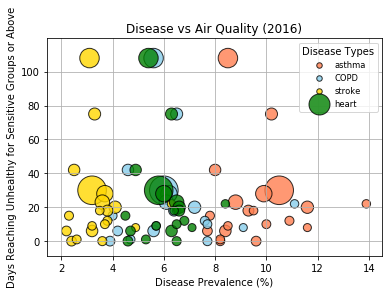

In [58]:
# using unhealthy days for y
plt.scatter(asthma_prevalence,
            daysUnhealthyForSensitiveOrAbove,
            s=population/10000, c="coral",
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="asthma")

plt.scatter(COPD_prevalence,
            daysUnhealthyForSensitiveOrAbove,
            s=population/10000, c="skyblue",
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="COPD")

plt.scatter(stroke_prevalence,
            daysUnhealthyForSensitiveOrAbove,
            s=population/10000, c="gold",
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="stroke")

plt.scatter(heart_prevalence,
            daysUnhealthyForSensitiveOrAbove,
            s=population/10000, c="green",
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="heart")

# Incorporate the other graph properties
plt.title("Disease vs Air Quality (2016)")
plt.ylabel("Days Reaching Unhealthy for Sensitive Groups or Above")
plt.xlabel("Disease Prevalence (%)")
# plt.xlim((0,40))
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="small", mode="Expanded",
                  numpoints=1, scatterpoints=1,
                  loc="best", title="Disease Types",
                  labelspacing=0.5)

lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

